<a href="https://colab.research.google.com/github/minhhoang258/LeDinhHoangMinh20104043/blob/main/B%C3%A0i%20t%E1%BA%ADp%20nh%E1%BA%ADn%20di%E1%BB%87n%20gi%C3%A1%20tr%E1%BB%8B%20ti%E1%BB%81n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2 , zoom_range = 0.2, horizontal_flip = True) 
train=train_data.flow_from_directory('/content/drive/MyDrive/Nhandientien/Train',target_size=(150,150), batch_size=32, class_mode='categorical')
test = train_data.flow_from_directory('/content/drive/MyDrive/Nhandientien/Test',target_size=(150,150), batch_size=32, class_mode='categorical')
train.class_indices
test.class_indices

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 52 images belonging to 9 classes.
Found 52 images belonging to 9 classes.


{'1 ngan dong': 0,
 '10 ngan dong': 1,
 '100 ngan dong': 2,
 '2 ngan dong': 3,
 '20 ngan dong': 4,
 '200 ngan dong': 5,
 '5 ngan dong': 6,
 '50 ngan dong': 7,
 '500 ngan dong': 8}

In [8]:
Model=Sequential()

Model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
Model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

Model.add(MaxPooling2D(2,2))

Model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
Model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

Model.add(MaxPooling2D(2,2))

Model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
Model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

Model.add(MaxPooling2D(2,2))

Model.add(Flatten())

Model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
Model.add(Dropout(0.2))

Model.add(Dense(9,activation='softmax'))
Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
Model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Model.fit(train,epochs=300,batch_size=128,verbose=1, validation_data=test, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

In [4]:
Model.save("Nhan_dien_gia_tri_tien.h5")

In [5]:
test_lost,test_acc=Model.evaluate(test)
print('Test accuracy:',test_acc)

2/2 [==============================] - 3s 653ms/step - loss: 0.1113 - accuracy: 0.9615
Test accuracy: 0.9615384340286255


In [10]:
Model_CNN=load_model('Nhan_dien_gia_tri_tien.h5')

1/1 [==============================] - 0s 54ms/step
1 ngàn đồng


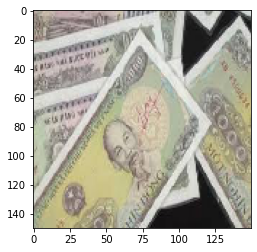

1/1 [==============================] - 0s 60ms/step
20 ngàn đồng


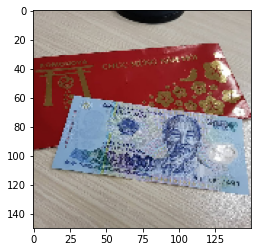

1/1 [==============================] - 0s 56ms/step
500 ngàn đồng


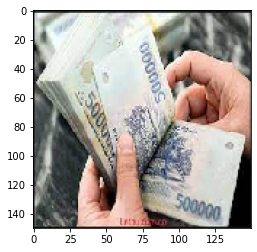

1/1 [==============================] - 0s 56ms/step
2 ngàn đồng


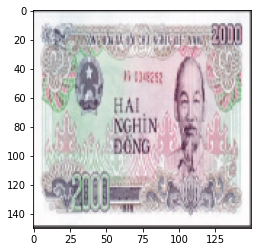

1/1 [==============================] - 0s 54ms/step
5 ngàn đồng


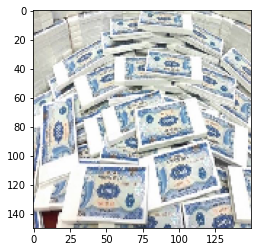

1/1 [==============================] - 0s 55ms/step
50 ngàn đồng


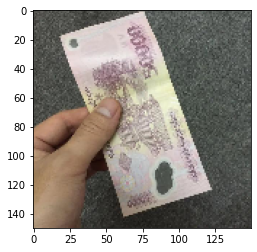

1/1 [==============================] - 0s 56ms/step
200 ngàn đồng


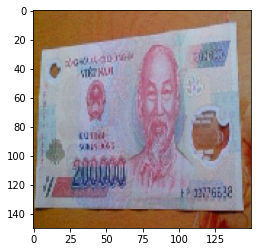

1/1 [==============================] - 0s 54ms/step
10 ngàn đồng


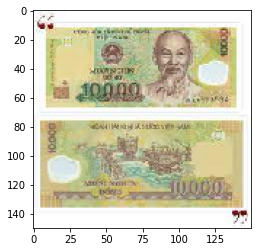

1/1 [==============================] - 0s 54ms/step
100 ngàn đồng


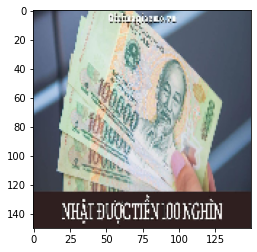

In [16]:
test="/content/drive/MyDrive/Nhandientien/Doantien"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=Model_CNN.predict(img)
  if round(result[0][0])==1:
    pred='1 ngàn đồng'
  if round(result[0][1])==1:
    pred='10 ngàn đồng'
  if round(result[0][2])==1:
    pred='100 ngàn đồng'
  if round(result[0][3])==1:
    pred='2 ngàn đồng'
  if round(result[0][4])==1:
    pred='20 ngàn đồng'
  if round(result[0][5])==1:
    pred='200 ngàn đồng'
  if round(result[0][6])==1:
    pred='5 ngàn đồng'
  if round(result[0][7])==1:
    pred='50 ngàn đồng'
  if round(result[0][8])==1:
    pred='500 ngàn đồng'
 
  print(pred)
  plt.show()

1/1 [==============================] - 0s 54ms/step
Đây là tờ: 500k


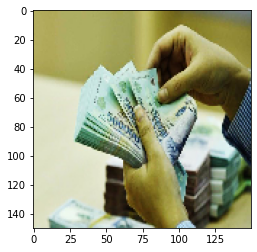

In [22]:
img = load_img('/content/le_phi_1.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
class_money=['1k','10k','100k','2k','20k','200k','5k','50k','500k']
a= int(np.argmax(Model.predict(img),axis=1))
print("Đây là tờ:", class_money[a])